In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx 

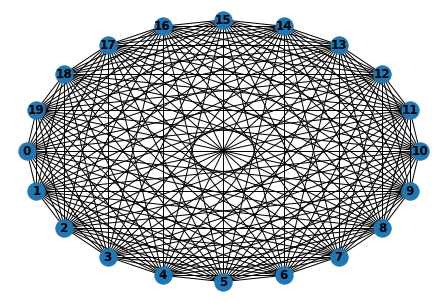

In [2]:
# Create a fully connected network

nb_households = 20

sn_matrix = np.zeros([nb_households,nb_households])

network = networkx.Graph()


for i in range(nb_households):
    network.add_node(i)
    
    for j in range(i):

        network.add_edge(i,j)

        sn_matrix[i][j] = 1
        sn_matrix[j][i] = 1
                   

networkx.draw_shell(network, with_labels=True, font_weight='bold')

sn_matrix_df = pd.DataFrame(sn_matrix)
sn_matrix_df.to_csv("fully_matrix.csv",index=False,header=False)

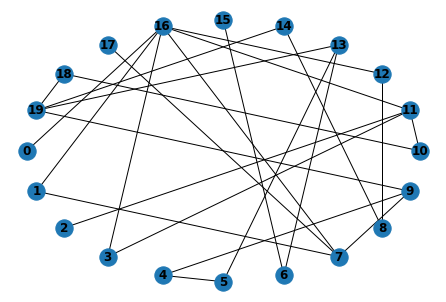

In [3]:
# Create a sparsely connected network

nb_households = 20
avg_sn_size = 3

sn_matrix = np.zeros([nb_households,nb_households])

network = networkx.Graph()


for i in range(nb_households):
    network.add_node(i)
    
    for j in range(i):
        
        if random.uniform(0,1) < avg_sn_size/nb_households:
            
            network.add_edge(i,j)
            
            sn_matrix[i][j] = 1
            sn_matrix[j][i] = 1
                   

networkx.draw_shell(network, with_labels=True, font_weight='bold')

sn_matrix_df = pd.DataFrame(sn_matrix)
sn_matrix_df.to_csv("sparsely_matrix.csv",index=False,header=False)

In [4]:
nb_runs = 100
nb_ticks = 100

nb_households = 5


runs = {}

for i in range(nb_runs):
    tmp= pd.read_csv("results/result%s.csv"%i,skiprows=1,header=None,sep="],",engine='python')    
    
    
    
    households = {}
    for j in range(nb_households):
        cleanlist = list()
        for k in tmp[j][0][1:-1].split(','):
            
            cleanlist.append(float(k))
            
        households[j] = cleanlist
    runs[i] = households
            
    
    

FileNotFoundError: [Errno 2] No such file or directory: 'results/result0.csv'

In [ ]:
for i in runs:
    for j in runs[i]:
        plt.plot(runs[i][0][1:])

In [ ]:
for j in runs[0]:
    plt.plot(runs[j][0][1:])

In [ ]:
for j in runs[1]:
    plt.plot(runs[j][0][1:])

In [ ]:
nb_runs = 100
nb_ticks = 100

nb_households = 5


runs = {}

for i in range(nb_runs):
    tmp= pd.read_csv("results/avg_es%s.csv"%i,skiprows=1,header=None,sep="],",engine='python')    
   

    cleanlist = list()
    for k in tmp[0][0][1:-1].split(','):

        cleanlist.append(float(k))

    runs[i] = cleanlist
            

In [ ]:
for r in runs:
    plt.plot(runs[r])

In [9]:
runs = {}
betas = list()
for b in range(11):
    betas.append(b/10.)

for a in range(nb_runs):
    
    
    beta_results = {}   
    for b in betas:
        tmp= pd.read_csv("results/avg_es%sbeta%s.csv"%(a,b),skiprows=1,header=None,sep="],",engine='python') 
        
     
        cleanlist = list()
        for k in tmp[0][0][1:-1].split(','):

            cleanlist.append(float(k))
        
        beta_results[b] = cleanlist
    runs[a] = beta_results

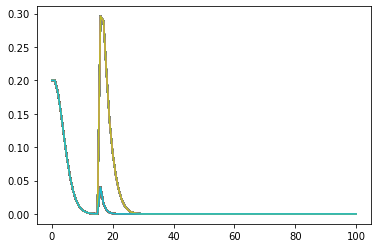

In [10]:
for r in runs:
    plt.plot(runs[r][0.2])
    plt.plot(runs[r][1.0])

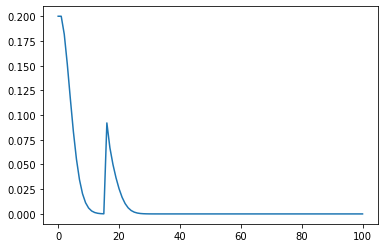

In [11]:
plt.plot(runs[0][0.0])

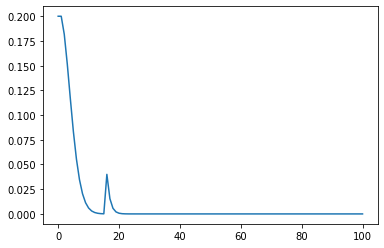

In [12]:
plt.plot(runs[0][1.0])